# PERCEPTRON

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)  ## Let's us import the perceptron class in perceptron.py

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import pandas as pd

## Create Linearly Separable Dataset

In [3]:
X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=2, random_state=2023)
y = np.where(y == 0, 1, -1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

<Figure size 640x480 with 0 Axes>

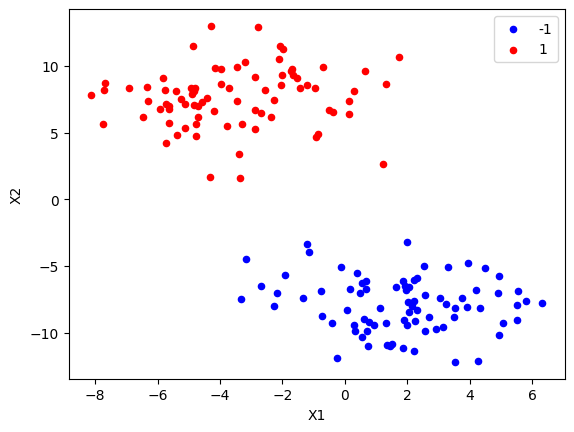

In [4]:
fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
df = pd.DataFrame(dict(X1=X_train[:,0], X2=X_train[:,1], label=y_train))
colors = {1:'red', -1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='X1', y='X2', label=key, color=colors[key])
plt.show()

### Clearly data is linearly separable => Perceptron is applicable

## Train 

In [5]:
from linear_models import perceptron

In [6]:
p = perceptron.Perceptron()
p.fit(X_train, y_train)

Perceptron converged in 2 iterations over the dataset.


In [7]:
print(p.mistakes_by_iter)

[1, 0]


## Test

In [8]:
y_test_pred = p.predict(X_test)

In [9]:
def calculate_accuracy(y_actual, y_expected):
    return np.sum(y_actual == y_expected)/len(y_expected)

In [10]:
calculate_accuracy(y_test_pred, y_test)

1.0

## Perceptron Decision Boundary

In [11]:
p.weights

array([-0.99993983, -2.16499193,  8.01889872])

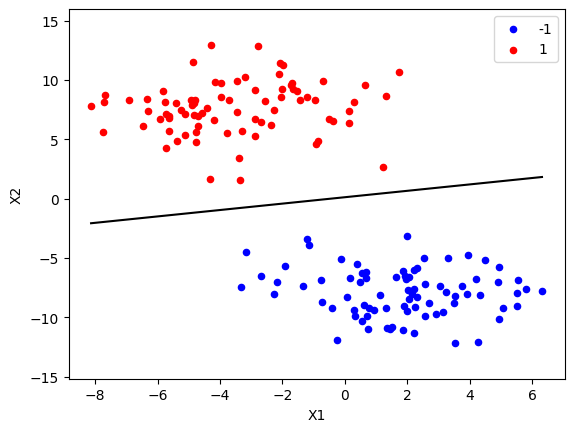

In [12]:
# https://www.thomascountz.com/2018/04/13/calculate-decision-boundary-of-perceptron
# y = (-w1/w2)* x  - (b / w2)

# Find 2 points in the dataset (one with smallest X1 (X1_0) and one with largest X1 (X1_1)). Find X2 which lies on decision boundary
# for these 2 points

X1_0 = np.amin(X_train[:, 0])
X1_1 = np.amax(X_train[:, 0])

w1 = p.weights[1]
w2 = p.weights[2]
b = p.weights[0]


X2_0 = (-w1 * X1_0 - b) / w2
X2_1 = (-w1 * X1_1 - b) / w2

fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='X1', y='X2', label=key, color=colors[key])
ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])
ax.plot([X1_0, X1_1], [X2_0, X2_1], "k")
plt.show()

While this boundary looks right, it may not be (and doesn't appear to be) a maximum margin classifier. 